<a href="https://colab.research.google.com/github/vstrah00/wave-propagation-cuda-vs-cpu/blob/main/cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPU Execution Time: 2.2689 seconds


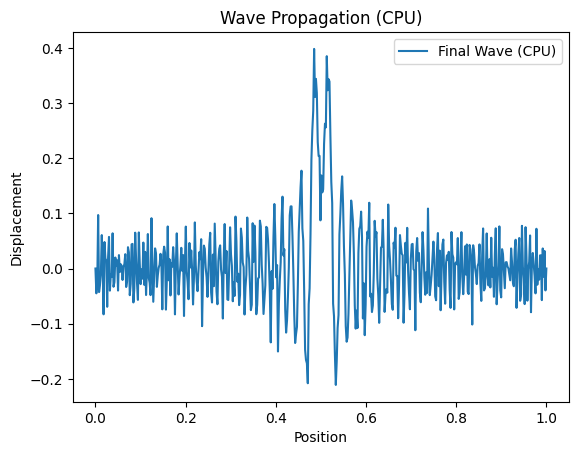

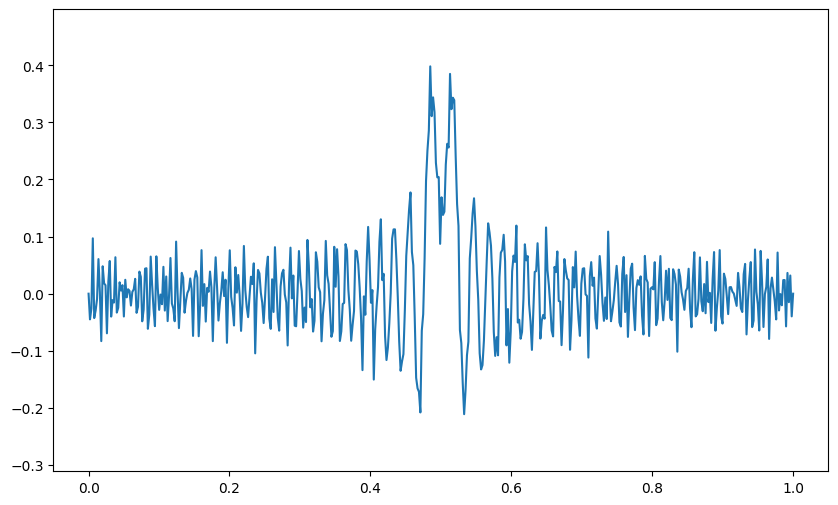

In [ ]:
# CPU: Wave Propagation on CPU

import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simulation parameters
L = 1.0       # Length of the string
N = 500       # Number of grid points (larger grid for more computation)
dx = L / N    # Grid spacing
c = 1.0       # Wave speed
dt = 0.001    # Lowered time step to prevent overflow
steps = 2000  # More steps for a longer simulation

# Initialize arrays
u_prev = np.zeros(N)
u_curr = np.zeros(N)
u_next = np.zeros(N)

# Initial condition
u_curr[N // 2] = 1.0  # Initial impulse in the middle of the string

# Store wave frames for video
wave_frames = []

# Measure CPU execution time
start_time = time.time()

# Simulation loop
for _ in range(steps):
    # Apply boundary conditions (fixed ends)
    u_next[0] = u_next[-1] = 0
    for i in range(1, N - 1):
        # Ensure numerical stability by checking for NaN or Inf
        try:
            u_next[i] = 2 * u_curr[i] - u_prev[i] + (c * dt / dx)**2 * (u_curr[i+1] - 2 * u_curr[i] + u_curr[i-1])
        except OverflowError:
            u_next[i] = 0  # If overflow occurs, set to zero
        except ValueError:
            u_next[i] = 0  # If NaN or Inf, set to zero

    # Update variables for the next iteration
    u_prev, u_curr, u_next = u_curr, u_next, u_prev

    # Store frame for video
    wave_frames.append(u_curr.copy())

# Measure end time
end_time = time.time()
cpu_execution_time = end_time - start_time
np.save("cpu_time.npy", np.array(cpu_execution_time))  # Save execution time

# Save wave frames for video
np.save("cpu_wave_frames.npy", wave_frames)

# Print CPU execution time
print(f"CPU Execution Time: {cpu_execution_time:.4f} seconds")

# Plot the final wave result
x = np.linspace(0, L, N)
plt.plot(x, u_curr, label="Final Wave (CPU)")
plt.title("Wave Propagation (CPU)")
plt.xlabel("Position")
plt.ylabel("Displacement")
plt.legend()
plt.show()

# Create an animation of the wave propagation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, np.zeros(N), label="Wave")
ax.set_ylim(min(u_curr) - 0.1, max(u_curr) + 0.1)  # Set initial y-limits

def update_frame(frame):
    line.set_ydata(frame)
    ax.set_ylim(min(frame) - 0.1, max(frame) + 0.1)  # Update y-limits for each frame
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update_frame, wave_frames, blit=True, interval=50)

# Save animation
try:
    ani.save('cpu_wave_propagation.mp4', writer='ffmpeg', fps=30)
except ValueError as e:
    print(f"Error saving video: {e}")
